# Algoritmia
## Práctica Obligatoria 1
### Curso 2022 - 2023
###### Métodos Voraces
---
 

#### Autores:
* Alvar San Martin
* <>

---
Resuelva la siguiente práctica.


**Recuerda**: 
* Solamente puedes utilizar librerías nativas (https://docs.python.org/es/3.7/library/index.html).
  * <sub><sup>_Importe las librerías que desees._</sup></sub>
* Se recomienda utilizar un entorno con la versión 3.7 (`conda create -n <nombre_entorno> python=3.7`). Más información en https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html.
* Las funciones que importes no son "gratis", cada una tendrá una complejidad temporal y espacial que se tendrá que tener en cuenta.
* Las funciones que crees, han de estar en una celda que comience por `#testeable` para que se importe en los test.

**Entrega**
* Poner el nombre del fichero como: `<apellidosPrimerAlumno>_<apellidosSegundoAlumno>_voraz.ipynb`.
    * <sub><sup>_En caso de que el fichero no tenga ese nombre, la entrega tendrá una penalización de **2 puntos**_></sup></sub>
* Verificar que la entrega no está corrupta.
    * <sub><sup>_En caso de que la entrega está corrupta, se evaluará con **0 puntos**_.</sup></sub>
* Ambos alumnos tendrán que hacer la entrega.
    * <sub><sup>_En caso de que uno no la haga se evaluará como **No presentado**, si las entregas son diferentes tendrá cada una una penalización de **2 puntos**_ y se corregirán por separado.</sup></sub>


In [1]:
#testeable
# Imports útiles
import bisect
import math
import queue
import heapq

### **Sopas y Caldos S.L.**

In [2]:
#testeable
class Sopa:
    """
    Clase Sopa. 
    Representa una sopa o caldo.
    """

    def __init__(self, nombre, coste):
        """Crea un objeto de clase Sopa

        Parameters
        ----------
        nombre : str
            Nombre de la sopa
        coste : number
            Coste de hacer una olla de sopa
        """
        self.nombre = nombre
        self.coste = coste
        self.popularidad = {}

    def __hash__(self):
        """Genera el valor hash identificativo de la sopa

        Returns
        -------
        int
            Valor hash
        """
        return hash((self.nombre, self.coste))

    def __str__(self):
        """Genera una cadena descriptiva del objeto

        Returns
        -------
        str
            Cadena descriptiva
        """
        return (f"[Sopa: {self.nombre}@{self.coste}€]")

    def __repr__(self):
        """Genera una cadena descriptiva del objeto dentro de colecciones

        Returns
        -------
        str
            Cadena descriptiva
        """  
        return (f"Sopa[{self.nombre}@{self.coste}€]")

    def set_popularidad(self, restaurante, pedidos):
        """Dado un restuarante y un número de pedidos anteriores,
           almacena para esta sopa la popularidad que tiene.

        Parameters
        ----------
        restaurante : str
            Restaurante donde se ha pedido esta sopa o caldo
        pedidos : int
            Número de pedidos anteriores
        """
        #? Se suman todos los pedidos
        if restaurante in self.popularidad:
            self.popularidad[restaurante] += pedidos
        else:
            self.popularidad[restaurante] = pedidos


    def get_popularidad(self, restaurante):
        """Dado un restaurante, obtiene la popularidad de la sopa

        Parameters
        ----------
        restaurante : str
            Restaurante donde se vende esta sopa o caldo

        Returns
        -------
        int
            Popularidad de la sopa en el restaurante
        """
        return self.popularidad.get(restaurante) if (restaurante in self.popularidad) else 0

    """Funciones del profesor"""
    def __eq__(self, obj):
        return self.nombre == obj.nombre and self.coste == obj.coste

    def __lt__(self, obj):
        return self.coste < obj.coste


In [3]:
''' Pruebas
'''
s1 = Sopa("S1",1)
s1.set_popularidad("r1", 5)
s1.set_popularidad("r1", 5)
pop = s1.get_popularidad("r1")
pop

10

In [4]:
#testeable
class Restaurante:
    """
    Clase del restuarante de Sopas y Caldos SL.
    """

    def __init__(self, identificador, nombre, presupuesto):
        """Instancia un Restaurante

        Parameters
        ----------
        identificador : int
            Valor que identifica el restaurante.
        nombre : str
            Nombre del restaurante.
        presupuesto : int
            Cantidad de dinero para hacer las ollas de sopa en un día.
        """
        self.identificador = identificador
        self.nombre = nombre
        self.presupuesto = presupuesto
        # Set de sopas que se han preparado
        self.pedidos = {}

    def __hash__(self):
        """Genera el valor hash identificativo del restaurante

        Returns
        -------
        int
            Valor hash
        """
        return hash(self.identificador)

    def __str__(self):
        """Genera una cadena descriptiva del objeto

        Returns

        str
            Cadena descriptiva
        """
        return (f"Resturante: ID[{self.identificador}], \
            Nombre[{self.nombre}], \
            Presupuesto[{self.presupuesto}]")

    def __repr__(self):
        """Genera una cadena descriptiva del objeto en colecciones

        Returns
        -------
        str
            Cadena descriptiva
        """      
        return (f"Res(#{self.identificador},{self.nombre},{self.presupuesto})")

    def prepara(self, sopas):
        """Dada una colección de sopas o caldos,
           seleccionar de cada uno cuanta cantidad (entre 0 y 1)
           se van a preparar.
           Se ha de optimizar la popularidad para que sea la máxima posible.
           ?? uso de popu/precio como metrica
           ?? Algoritmo de la "mochila"
        Parameters
        ----------
        sopas : collection
            Colección de sopas que se pueden preparar.
        """

        maxs, mins = 1, 0
        presu = self.presupuesto

        # tabla sopa para saber la popularidad por precio
        # maximizar popularidad, minimizar precio
        calculada = []
        for sopa in sopas:
            bisect.insort(calculada,
                    (sopa.get_popularidad(self.nombre) / sopa.coste, sopa)
                    )
        print(calculada)
        # tabla de salida
        salida = []

        # O(n)
        while (presu > 0) and len(calculada) > 0:
            # selecciona sopa mas a la derecha
            sopa_seleccionada = calculada.pop()
            maximo_producido = maxs * sopa_seleccionada[1].coste
            if presu > maximo_producido:
                # coste del maximo producido de la sopa mas rentable
                print(f"[{presu}€] Se puede producir un maximo de {maximo_producido}€ para {sopa_seleccionada}")
                par = (maxs, sopa_seleccionada[1])
                presu -= maximo_producido
            else:
                # se hacen el maximo de uds con el presupuesto
                maximo_viable = presu / sopa_seleccionada[1].coste
                print(f"El maximo viable de sopa con {presu}€ {sopa_seleccionada[1]} es {maximo_viable}")
                par = (maximo_viable, sopa_seleccionada[1])
                presu = 0

            salida.append(par)
            self.preparar_sopa(par[1], par[0])
        print(salida)
        return salida

    def preparar_sopa(self, sopa, cantidad):
        """ Inserta la cantidad de sopa que se ha creado 
            en el registro de creados

        Parameters
        ----------
        sopa : Sopa object
            Sopa que se ha preaprado
        """
        if sopa in self.pedidos:
            self.pedidos[sopa] += cantidad
        else:
            self.pedidos[sopa] = cantidad
        pass

    def cantidad_preparada(self, sopa):
        """Obtiene la cantidad de sopa preparada en el restaurante.

        Parameters
        ----------
        sopa : Sopa object
            Sopa del cual se quiere saber la cantidad preparada

        Returns
        -------
        float
            Cantidad de sopa preparada en el restaurante.
        """
        return sopa.pedidos(sopa)

    def sopas_preparadas(self):
        """Sopas preparadas en el restaurante

        Returns
        -------
        set
            Conjunto de tuplas (sopa, cantidad) de las sopas PREPARADAS en el restaurante.
        """
        return set(self.pedidos.items())

    def popularidad_total(self):
        """A partir de las sopas preparadas
           devolver la popularidad proporcional a la cantidad de sopa preparada.

        Returns
        -------
        number
            Popularidad proporcional a la cantidad de sopa preparada.
        """
        total = 0
        for sopa, cantidad in self.pedidos.items():
            total += (sopa.get_popularidad(self.nombre) * cantidad)
        return total

In [5]:
rest = Restaurante(1, "R1", 0)
sopas = [Sopa("sopa1", 1), Sopa("sopa2", 2), Sopa("sopa3", 10)]
sopas[0].set_popularidad("R1", 2)
sopas[1].set_popularidad("R1", 3)
sopas[2].set_popularidad("R1", 1)
resu = rest.prepara(sopas)
rest.popularidad_total()

[(0.1, Sopa[sopa3@10€]), (1.5, Sopa[sopa2@2€]), (2.0, Sopa[sopa1@1€])]
[]


0

### **Ministerio de Transporte, Movilidad y Agenda Urbana**

In [6]:
class Nodo:
    def __init__(self, hijos=[], data=None):
        self.hijos = hijos
        self.data = data

    def add_hijo(self, hijos=[], data=None):
        self.hijos.append(Nodo(hijos, data))

In [7]:
class Arco:
    def __init__(self, origen, coste, destino):
        self.origen = origen
        self.coste = coste
        self.destino = destino

    def __lt__(self, obj):
        return self.coste < obj.coste

    def __str__(self):
        return f"Arco({self.origen}--{self.coste}-->{self.destino})"

    def __repr__(self):
        return f"Arco({self.origen}-{self.coste}->{self.destino})"

In [18]:
#testeable
class RedComarcas:
    """
    Red de comarcas para conectar con carreteras.
    """

    def __init__(self, comarcas, costes):
        """Instancia de la red de comarcas

        Parameters
        ----------
        comarcas : Iterable
            Conjunto de Comarcas disponibles
        distancias : dict{str (Nombre comarca): dict{str (Nombre comarca): int}}
            Grafo de costes de una carretera entre dos comarcas.
        """
        self.comarcas = comarcas
        self.costes = costes

    def prim_v1(self):
        grafo = self.costes.copy()
        # El arbol de destino es un set de arcos
        arbol_destino = set()

        # Es una lista pero se usa como cola de prioridad
        # un heap para mejorar la eficiencia
        # contiene los arcos sueltos del arbol de destino
        arcos_arbol = []
        visitados = set()
        visitados.add(self.comarcas[0])
        nodo_inicio = self.comarcas[0]

        # Construccion del heap inicial con los arcos que parten del inicio
        for destino, coste in grafo[nodo_inicio].items():
            # Necesitamos darle un formato que permita ver de forma unica 
            # cada arco
            heapq.heappush(arcos_arbol, (coste, nodo_inicio, destino))

        # Mientras queden arcos en la cola
        while arcos_arbol:
            print("*********")
            print("Visitados: ", visitados)
            print("Heap ", arcos_arbol)

            coste, org, dest = heapq.heappop(arcos_arbol)
            print(f"POP: ({coste},{org},{dest})")

            # Si no se ha visitado el destino
            if dest not in visitados:
                # Se guarda el destino como visitado
                visitados.add(dest)

                # Se agregan los arcos que salen de el destino y no estan
                # en visitados destino->destino_destino
                for destino_destino, coste in grafo[dest].items():
                    if destino_destino not in visitados:
                        heapq.heappush(
                            arcos_arbol,
                            (coste, dest, destino_destino))

                # Como el arco es el de mayor prioridad 
                arbol_destino.add((coste, org, dest))
        return arbol_destino


    def construir_carreteras(self):
        """A partir del grafo de costes
           hacer una selección de carreteras que conecten todas las comarcas
           con el menor coste posible. Todas las comarcas deben estar conectadas a la red.
        """
        # Comarcas ya introducidas
        recorridos = []

        # Comarcas restantes
        restantes = self.comarcas.copy()

        # Nodos con posibles hijos
        abiertos = []

        # Lista de arcos potenciales
        hijos = []

        # Arbol de comarcas-coste
        arbol = {}

        ## Se obtiene el estado inicial nodo-lista de arcos ##

        # Se parte de la primera comarca, se la usa de nodo raiz y se añade a 
        # recorridos
        ini = restantes.pop()
        raiz = Nodo(data=ini)

        recorridos.append(ini)
        abiertos.append(ini)

        # Se sacan todos los arcos del arbol(abiertos)
        # Cola de arcos
        for origen in abiertos:
            for destino, coste in self.costes[origen].items():
                # El destino no puede estar en abiertos (ya en el arbol)
                if destino not in abiertos:
                    bisect.insort(hijos, Arco(origen, coste, destino))

        # se busca el menor arco > lista ordenada de menor a mayor
        print("## Cola de arcos ##")
        print(hijos)
        print("###################")

        ## Hasta aqui estado inicial

        # Mientras queden nodos a los que no se ha llegado se buscan 
        # los arcos menores
        while len(restantes) > 0:
            # Se saca el siguiente arco minimo viable
            actual = hijos.pop(0)
            while actual in abiertos:
                actual = hijos.pop(0)

            # Se guarda el destino como visitado
            abiertos.append(actual.destino)

            # Se obtienen los arcos
            for destino, coste in self.costes[actual.destino].items():
                # El destino no puede estar en abiertos (ya en el arbol)
                if destino not in abiertos:
                    bisect.insort(hijos, Arco(origen, coste, destino))

            print("## Cola de arcos ##")
            print(hijos)
            print("###################")
        pass

    def get_grafo(self):
        """Devuelve el grafo de costes recibido

        Returns
        -------
        dict{str (Nombre comarca): dict{str (Nombre comarca): int}}
            Grafo de costes de una carretera entre dos comarcas.
        """        
        return self.costes

    def get_carreteras(self):
        """Devuelve el grafo de carreteras a construir

        Returns
        -------
        Iterable
            Grafo de carreteras a construir
        """        
        return self.comarcas

    def coste_total(self):
        """Devuelve el coste total de las carreteras a construir

        Returns
        -------
        int
            Coste total de las carreteras a construir
        """        


In [19]:
# Gracias chatgtp por los datos de ejemplo
costes = {
    "Madrid": {"Barcelona": 621, "Valencia": 355, "Málaga": 533, "Murcia": 398},
    "Barcelona": {"Madrid": 621, "Valencia": 355, "Zaragoza": 307, "Palma de Mallorca": 212},
    "Valencia": {"Madrid": 355, "Barcelona": 355, "Sevilla": 546, "Murcia": 73, "Alicante": 166},
    "Sevilla": {"Madrid": 537, "Valencia": 546, "Málaga": 119, "Córdoba": 142},
    "Málaga": {"Madrid": 533, "Sevilla": 219, "Granada": 132},
    "Murcia": {"Madrid": 398, "Valencia": 73, "Albacete": 154},
    "Zaragoza": {"Barcelona": 307, "Bilbao": 295, "Pamplona": 174},
    "Palma de Mallorca": {"Barcelona": 212, "Valencia": 266, "Ibiza": 165},
    "Alicante": {"Valencia": 166, "Albacete": 128},
    "Córdoba": {"Sevilla": 142, "Jaén": 115},
    "Granada": {"Málaga": 132, "Almería": 166},
    "Albacete": {"Murcia": 154, "Alicante": 128, "Valencia": 169},
    "Bilbao": {"Zaragoza": 295, "Santander": 105},
    "Pamplona": {"Zaragoza": 174, "Logroño": 94},
    "Ibiza": {"Palma de Mallorca": 165},
    "Jaén": {"Córdoba": 115, "Almería": 152},
    "Almería": {"Granada": 166, "Jaén": 152},
    "Santander": {"Bilbao": 105},
    "Logroño": {"Pamplona": 94}
}

nodos = ["Madrid", "Barcelona", "Valencia", "Sevilla", "Málaga", "Murcia", "Zaragoza", "Palma de Mallorca", 
         "Alicante", "Córdoba", "Granada", "Albacete", "Bilbao", "Pamplona", "Ibiza", "Jaén", "Almería", 
         "Santander", "Logroño"]
red = RedComarcas(comarcas = nodos, costes = costes)

In [20]:
resultado = red.prim_v1()

*********
Visitados:  {'Madrid'}
Heap  [(355, 'Madrid', 'Valencia'), (398, 'Madrid', 'Murcia'), (533, 'Madrid', 'Málaga'), (621, 'Madrid', 'Barcelona')]
POP: (355,Madrid,Valencia)
*********
Visitados:  {'Valencia', 'Madrid'}
Heap  [(73, 'Valencia', 'Murcia'), (398, 'Madrid', 'Murcia'), (166, 'Valencia', 'Alicante'), (621, 'Madrid', 'Barcelona'), (546, 'Valencia', 'Sevilla'), (533, 'Madrid', 'Málaga'), (355, 'Valencia', 'Barcelona')]
POP: (73,Valencia,Murcia)
*********
Visitados:  {'Murcia', 'Valencia', 'Madrid'}
Heap  [(154, 'Murcia', 'Albacete'), (398, 'Madrid', 'Murcia'), (166, 'Valencia', 'Alicante'), (621, 'Madrid', 'Barcelona'), (546, 'Valencia', 'Sevilla'), (533, 'Madrid', 'Málaga'), (355, 'Valencia', 'Barcelona')]
POP: (154,Murcia,Albacete)
*********
Visitados:  {'Albacete', 'Murcia', 'Valencia', 'Madrid'}
Heap  [(128, 'Albacete', 'Alicante'), (398, 'Madrid', 'Murcia'), (166, 'Valencia', 'Alicante'), (621, 'Madrid', 'Barcelona'), (546, 'Valencia', 'Sevilla'), (533, 'Madrid', 'Má

In [21]:
def dict_a_grafo(diccionario):
    grafo = set()
    for origen, arcos in diccionario.items():
        for destino, coste in arcos.items():
            grafo.add((coste, origen, destino))
    return grafo

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

def ver_grafo(grafo):
    G = nx.Graph()

    for arco in grafo:
        G.add_edge(arco[1], arco[2], weight=arco[0])

    pos = nx.spring_layout(G,k=0.9,iterations=20)

    nx.draw_networkx_nodes(G, pos, node_size=200, node_color="#99FF99")
    nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")
    nx.draw_networkx_edges(G, pos, width=2, arrows=True, arrowstyle="-|>", edge_color='black')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_size=8)

    plt.axis('off')
    plt.show()


In [30]:
resultado

{(94, 'Pamplona', 'Logroño'),
 (94, 'Zaragoza', 'Pamplona'),
 (105, 'Bilbao', 'Santander'),
 (105, 'Zaragoza', 'Bilbao'),
 (115, 'Jaén', 'Córdoba'),
 (128, 'Albacete', 'Alicante'),
 (132, 'Madrid', 'Málaga'),
 (142, 'Córdoba', 'Sevilla'),
 (152, 'Almería', 'Jaén'),
 (152, 'Granada', 'Almería'),
 (154, 'Valencia', 'Murcia'),
 (165, 'Barcelona', 'Palma de Mallorca'),
 (165, 'Palma de Mallorca', 'Ibiza'),
 (166, 'Madrid', 'Valencia'),
 (166, 'Málaga', 'Granada'),
 (169, 'Murcia', 'Albacete'),
 (174, 'Barcelona', 'Zaragoza'),
 (212, 'Valencia', 'Barcelona')}

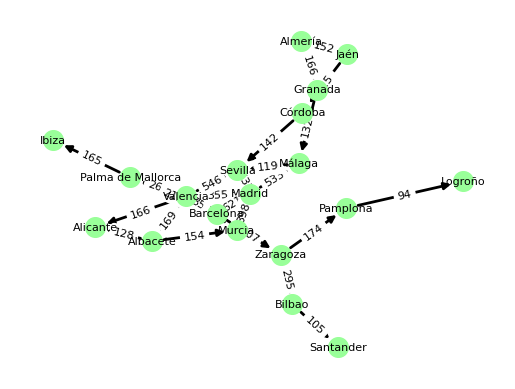

In [31]:
grafo = dict_a_grafo(costes)
ver_grafo(grafo)

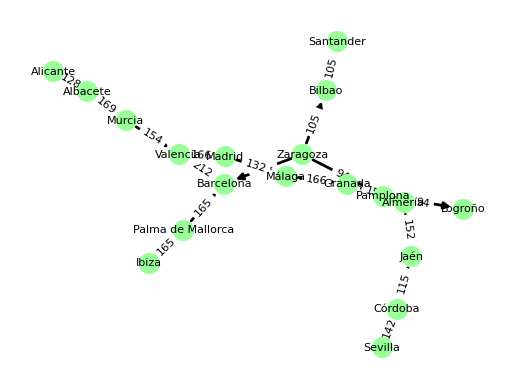

In [32]:
ver_grafo(resultado)

#### Caso de ejemplo

In [16]:
import json
import unittest

def carga_dataset(data):
    with open(data) as f:
        test_datasets = json.load(f)

    sopas = list()
    for comarca in test_datasets["sopas"]:
        s_obj = Sopa(comarca["nombre"], comarca["coste"])
        for c, u in comarca["popularidad"].items():
            s_obj.set_popularidad(c, u)
        sopas.append(s_obj)

    restaurantes = dict()
    for comarca in test_datasets["restaurantes"]:
        restaurantes[comarca["nombre"]] = Restaurante(comarca["identificador"], comarca["nombre"], comarca["presupuesto"])

    carreteras = test_datasets["carreteras"]
    c_ = dict()
    for comarca in carreteras:
        c_[comarca] = dict()
        for c in carreteras[comarca]:
            c_[comarca][c] = carreteras[comarca][c]
    
    print(c_)
    red = RedComarcas(carreteras.keys(), c_)
    
    return sopas, restaurantes

In [17]:
class TestBasico(unittest.TestCase):

    def test_ejemplo(self):

        s, r = carga_dataset("toy.json")

        restaurante_1 = r["El pintor"]
        restaurante_1.prepara(s)
        print("Popularidad total: ",restaurante_1.popularidad_total())
        self.assertEqual(restaurante_1.popularidad_total(), 15.8)
        preparadas = restaurante_1.sopas_preparadas()
        print("Preparadas: ", preparadas)
        self.assertIn((Sopa("Sopa de castañas", 5), 0.8), preparadas)

        c.construir_carreteras()
        self.assertEqual(c.coste_total(), 30)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

E
ERROR: test_ejemplo (__main__.TestBasico)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipykernel_3193/2285843476.py", line 15, in test_ejemplo
    c.construir_carreteras()
NameError: name 'c' is not defined

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (errors=1)


{'Briviesca': {'Briviesca': 0, 'Villarcayo': 10, 'Villadiego': 20, 'Medina de Pomar': 30}, 'Villarcayo': {'Briviesca': 10, 'Villarcayo': 0, 'Villadiego': 10, 'Medina de Pomar': 20}, 'Villadiego': {'Briviesca': 20, 'Villarcayo': 10, 'Villadiego': 0, 'Medina de Pomar': 10}, 'Medina de Pomar': {'Briviesca': 30, 'Villarcayo': 20, 'Villadiego': 10, 'Medina de Pomar': 0}}
[(1.0, Sopa[Sopa de ajo@4€]), (1.2, Sopa[Sopa de castañas@5€]), (1.5, Sopa[Sopa de pescado@2€]), (2.0, Sopa[Caldo de pollo@1€]), (2.0, Sopa[Estofado de verduras@3€])]
[10€] Se puede producir un maximo de 3€ para (2.0, Sopa[Estofado de verduras@3€])
[7€] Se puede producir un maximo de 1€ para (2.0, Sopa[Caldo de pollo@1€])
[6€] Se puede producir un maximo de 2€ para (1.5, Sopa[Sopa de pescado@2€])
El maximo viable de sopa con 4€ [Sopa: Sopa de castañas@5€] es 0.8
[(1, Sopa[Estofado de verduras@3€]), (1, Sopa[Caldo de pollo@1€]), (1, Sopa[Sopa de pescado@2€]), (0.8, Sopa[Sopa de castañas@5€])]
Popularidad total:  15.8
Prepara

##### **Tests**

Para probar que tu solución pasa los tests. Utilice el comando:

```bash
$ python tests-py3<version de python> <mi notebook>
```

Los tests necesitan de las librerías `networkx` y `nbformat`

```bash
$ pip install networkx nbformat
```

###### Explicación de los tests
* `test_ejemplo`: Es el mismo que el caso de ejemplo.
* `test_ej1_popularidad_correcta`: Comprueba que la popularidad total del restaurante, acorde a las sopas preparadas, es correcta.
* `test_ej1_sin_prosupuesto`: Comprueba que ante un restaurante sin presupuesto no se prepararan sopas.
* `test_ej1_presupuesto_infinito`: Comprueba que ante un restaurante con presupuesto infinito se preparan todas las sopas.
* `test_ej1_restaurante_no_existe`: Comprueba que ante un restaurante que no existe no se preparan sopas (ya que la sopa no tendría almacenado la popularidad del restaurante).
* `test_ej2_estructura_datos_mas_simple`: Comprueba que la estructura de datos que se utiliza para almacenar las carreteras es más simple que el grafo original.
* `test_ej2_red_carreteras_consistente`: Comprueba que la red de carreteras que se obtiene es consistente con el grafo original, es decir, no hay caminos nuevos y los costes son los mismos.
* `test_ej2_costes_correctos`:  Comprueba que el coste de la red de carreteras es el mínimo posible.
* `test_ej2_red_carreteras_conexas`: Comprueba que la red de carreteras que se obtiene es conexa, es decir, no existen subconjuntos de comarcas aisladas.


---

### **Informe**
Contesta a las siguientes preguntas.

#### **Complejidad**

1. Método `Restaurante.prepara`
    * **Complejidad temporal**: _contesta aquí_
    * **Complejidad espacial**: _contesta aquí_
2. Método `ResComarcas.construir_carreteras`
    * **Complejidad temporal**: _contesta aquí_
    * **Complejidad espacial**: _contesta aquí_

#### **Sopas y Caldos S.L.**

* ¿La solución es óptima (maximiza siempre el ratio de popularidad) o es aproximada (encuentra un máximo local)?

_Contesta aquí justificando la respuesta_

* ¿Qué efectos a largo plazo tendría utilizar el criterio de popularidad para la planificación? Ten en cuenta que la popularidad se calcula como todas las veces que esa tortilla se ha pedido en el pasado.

_Contesta aquí justificando la respuesta_

#### **Ministerio de Transporte, Movilidad y Agenda Urbana**

* ¿La solución es óptima (minimiza siempre el valor pedido) o es aproximada (encuentra un mínimo local)?

_Contesta aquí justificando la respuesta_

* Se te da un coste por cada par de localidades, pero, si existiesen carreteras que no se puede hacer, ¿qué efectos tendría en tu solución? 

_Contesta aquí justificando la respuesta_